# Week 4 - Univariate Analysis, part 2

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [35]:
# set variables
kaggle_dataset_path = "khusheekapoor/vehicle-insurance-fraud-detection"
kaggle_dataset_file_name = "carclaims.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.copy()

# show top rows
dataset.head()


Path to kaggle dataset: khusheekapoor/vehicle-insurance-fraud-detection
Kaggle dataset file name: carclaims.csv
Path to downloaded file: C:\Users\serge\.cache\kagglehub\datasets\khusheekapoor\vehicle-insurance-fraud-detection\versions\1


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [36]:
dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [37]:
# Summarize the datasets using info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [38]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [40]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Check for duplicate values in inappropriate columns (e.g., unique identifiers)
duplicate_customer_ids = dataset["PolicyNumber"].duplicated().sum()
print(f"Number of duplicate PolicyNumbers: {duplicate_customer_ids}")


Number of duplicate rows: 0
Number of duplicate PolicyNumbers: 0


In [41]:
# Compute mean, median, and mode
mean_values = dataset.mean(numeric_only=True)
median_values = dataset.median(numeric_only=True)
mode_values = dataset.mode().iloc[0]
 
# Combine mean, median, and mode into a single table
statistics_table = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})
print("Combined Statistics Table:\n", statistics_table)

Combined Statistics Table:
                              Mean  Median               Mode
AccidentArea                  NaN     NaN              Urban
AddressChange-Claim           NaN     NaN          no change
Age                     39.855707    38.0               30.0
AgeOfPolicyHolder             NaN     NaN           31 to 35
AgeOfVehicle                  NaN     NaN            7 years
AgentType                     NaN     NaN           External
BasePolicy                    NaN     NaN          Collision
DayOfWeek                     NaN     NaN             Monday
DayOfWeekClaimed              NaN     NaN             Monday
Days:Policy-Accident          NaN     NaN       more than 30
Days:Policy-Claim             NaN     NaN       more than 30
Deductible             407.704280   400.0              400.0
DriverRating             2.487808     2.0                1.0
Fault                         NaN     NaN      Policy Holder
FraudFound                    NaN     NaN                

In [42]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


In [43]:
# Handling missing values
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)
print("Missing values filled with column means.")


Missing values filled with column means.


Note: The dataset does not contain any missing values or duplicates. This can be explained by its synthetic origin.

In [16]:
# Identify inconsistent data (e.g., negative age values)
inconsistent_age = dataset[dataset["Age"] < 0]
print(f"Number of inconsistent ages: {len(inconsistent_age)}")



inconsistent_WeekOfMonth  = dataset[dataset["WeekOfMonth"] > 52]
print(f"Number of inconsistent Week Of Month: {len(inconsistent_WeekOfMonth )}")

Number of inconsistent ages: 0
Number of inconsistent Week Of Month: 0


In [17]:
# Encode categorical variables using one-hot encoding
categorical_columns = ["Make", "Sex", "MaritalStatus"]
df_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)
print("Categorical variables encoded.")
df_encoded.head()

Categorical variables encoded.


,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,Fault,PolicyType,...,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,Dec,5,Wednesday,Urban,Tuesday,Jan,1,21,Policy Holder,Sport - Liability,...,False,False,False,False,False,False,False,False,True,False
1,Jan,3,Wednesday,Urban,Monday,Jan,4,34,Policy Holder,Sport - Collision,...,False,False,False,False,False,False,True,False,True,False
2,Oct,5,Friday,Urban,Thursday,Nov,2,47,Policy Holder,Sport - Collision,...,False,False,False,False,False,False,True,True,False,False
3,Jun,2,Saturday,Rural,Friday,Jul,1,65,Third Party,Sedan - Liability,...,False,False,False,False,True,False,True,True,False,False
4,Jan,5,Monday,Urban,Tuesday,Feb,2,27,Third Party,Sport - Collision,...,False,False,False,False,False,False,False,False,True,False


In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Month                  15420 non-null  object
 1   WeekOfMonth            15420 non-null  int64 
 2   DayOfWeek              15420 non-null  object
 3   AccidentArea           15420 non-null  object
 4   DayOfWeekClaimed       15420 non-null  object
 5   MonthClaimed           15420 non-null  object
 6   WeekOfMonthClaimed     15420 non-null  int64 
 7   Age                    15420 non-null  int64 
 8   Fault                  15420 non-null  object
 9   PolicyType             15420 non-null  object
 10  VehicleCategory        15420 non-null  object
 11  VehiclePrice           15420 non-null  object
 12  PolicyNumber           15420 non-null  int64 
 13  RepNumber              15420 non-null  int64 
 14  Deductible             15420 non-null  int64 
 15  DriverRating       

In [19]:
# Convert boolean columns to integer
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Month                  15420 non-null  object
 1   WeekOfMonth            15420 non-null  int64 
 2   DayOfWeek              15420 non-null  object
 3   AccidentArea           15420 non-null  object
 4   DayOfWeekClaimed       15420 non-null  object
 5   MonthClaimed           15420 non-null  object
 6   WeekOfMonthClaimed     15420 non-null  int64 
 7   Age                    15420 non-null  int64 
 8   Fault                  15420 non-null  object
 9   PolicyType             15420 non-null  object
 10  VehicleCategory        15420 non-null  object
 11  VehiclePrice           15420 non-null  object
 12  PolicyNumber           15420 non-null  int64 
 13  RepNumber              15420 non-null  int64 
 14  Deductible             15420 non-null  int64 
 15  DriverRating       

In [20]:
# Check for class imbalance in categorical columns
for col in categorical_columns:
    print(f"Class distribution for {col}:\n", dataset[col].value_counts())


Class distribution for Make:
 Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64
Class distribution for Sex:
 Sex
Male      13000
Female     2420
Name: count, dtype: int64
Class distribution for MaritalStatus:
 MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64


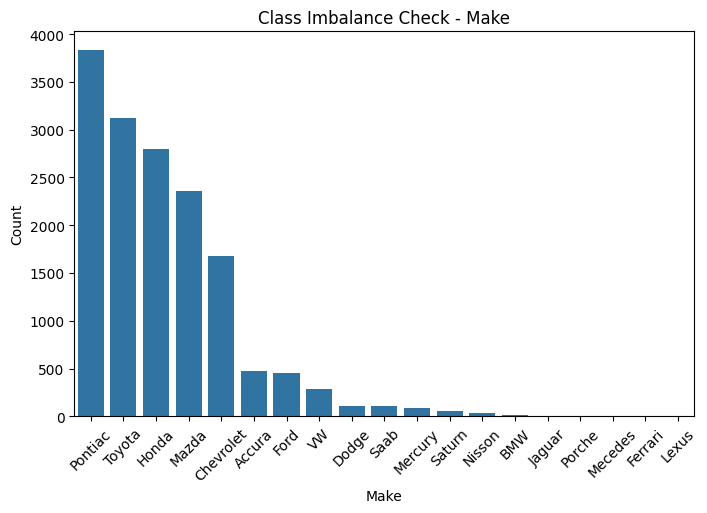

In [23]:
# "Make", "Sex", "MaritalStatus"
# Display class imbalance
df_categorical = pd.DataFrame({
    "Make": dataset["Make"].value_counts().index,
    "Count": dataset["Make"].value_counts().values
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Make", y="Count", data=df_categorical)
plt.title("Class Imbalance Check - Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

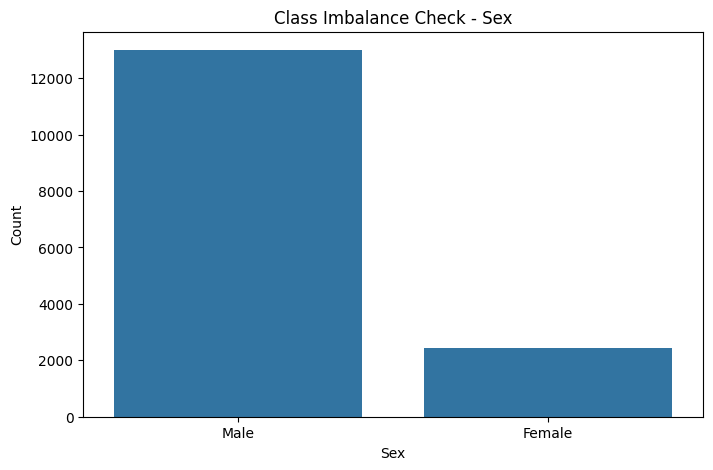

In [25]:
# Display class imbalance in Gender
df_gender = pd.DataFrame({
    "Sex": dataset["Sex"].value_counts().index,
    "Count": dataset["Sex"].value_counts().values
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Count", data=df_gender)
plt.title("Class Imbalance Check - Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

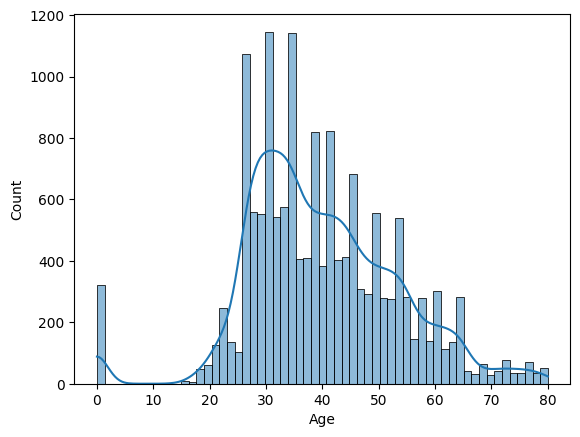

In [26]:

# KDE plot of Age
sns.histplot(dataset["Age"], kde = True)

<Axes: xlabel='Fault', ylabel='Count'>

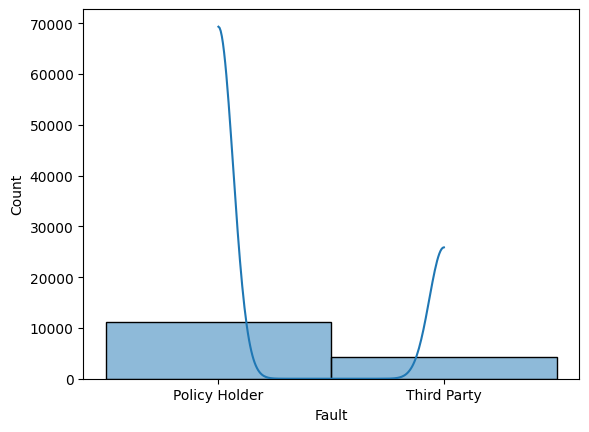

In [30]:
# KDE plot of Fault
sns.histplot(dataset["Fault"], kde = True)

- The dataset is not evenly distributed across car makers
- Gender is not evenly balanced with higher number of males.

### Conclusions:
 - Identify required modifications or corrections: No modifications are needed since it is synthetic data.
 - Detect class imbalances: The dataset has an uneven distribution in Make and Gender. These factors should be considered in model development.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

#### FIGURE 2.7 Modified scatterplot (page 45)

In [111]:
# Generate synthetic data
# Adjust data distribution to better match a U-shaped (parabolic) curve
np.random.seed(42)

# Generate miles driven values
x = np.linspace(500, 4000, 50)

# Create a U-shaped distribution for cost per mile (parabolic)
y_base = 1.0 + ((x - 2000) ** 2) / 3e6  # Parabolic shape with a minimum around 2000 miles

# Add some random noise
cost_per_mile = y_base + np.random.uniform(-0.2, 0.2, len(x))

# Determine colors based on threshold
colors = ['orange' if c > 1.5 else 'gray' for c in cost_per_mile]


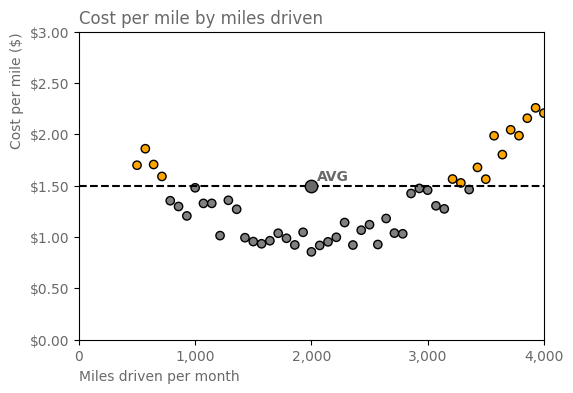

In [112]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, cost_per_mile, c=colors, edgecolors='black')

# Add the average cost per mile line
plt.axhline(avg_cost, color='black', linestyle='dashed')

# Add the "AVG" point as a dark gray dot
plt.scatter([2000], [avg_cost], color='dimgray', s=80, edgecolors='black', zorder=3)
plt.text(2050, avg_cost + 0.05, "AVG", fontsize=10, fontweight='bold', color='dimgray')

# Labels with dark gray color
plt.xlabel("Miles driven per month", color='dimgray', loc='left')
plt.ylabel("Cost per mile ($)", color='dimgray', loc='top')
plt.title("Cost per mile by miles driven", color='dimgray', loc='left')

# Formatting
plt.xticks([0, 1000, 2000, 3000, 4000], labels=['0', '1,000', '2,000', '3,000', '4,000'], color='dimgray')
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], labels=["$0.00", "$0.50", "$1.00", "$1.50", "$2.00", "$2.50", "$3.00"], color='dimgray')
plt.xlim(0, 4000)
plt.ylim(0, 3)

# Show plot
plt.show()
